<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON611
### Lecture 11 -  Pandas - Group By: split-apply combine
- Notes adapted from: 

    1. [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)




## <span style="color:blue">THE OPERATIONS</span>
---

1. Splitting the data into groups based on some criteria.
2. Applying a function to each group independently.
3. Combining the results into a data structure.

The idea here is that once we split our data set into groups we can apply different computations to each group and then combine them back.

Does this looks familiar:

```sql 
SELECT Column1, Column2, mean(Column3), sum(Column4)
FROM SomeTable
GROUP BY Column1, Column2
```

And by different computations I mean:

```
1. Aggregation: compute a summary statistic (or statistics) for each group. 
    Compute group sums or means.
    Compute group sizes / counts.

2. Transformation: perform some group-specific computations and return a like-indexed object. 
    Standardize data (zscore) within a group.
    Filling NAs within groups with a value derived from each group.

3. Filtration: discard some groups, according to a group-wise computation that evaluates True or False. 
    Discard data that belongs to groups with only a few members.
    Filter out data based on the group sum or mean.

```

We are going to use a somehow clean version of the ***Titanic Dataset*** for this lecture. Here is the data [dictionary](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [3]:
#### Read the dataset

## this option is ok is just more lines of code
# path_to_file = '../../datasets/titanic/titanic_clean.csv' ## Change it to your path
# titanic = pd.read_csv(path_to_file)
# titanic.head(4)

## this option is also ok, but need to add more details to the data I read
titanic = pd.read_csv("../../datasets/titanic/titanic_clean.csv")

In [4]:
## describe the dataset
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.0,448.589888,258.683191,1.00,222.75,445.00000,677.25,891.0000
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.00,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.00,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.00,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.00,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.00,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.00,512.3292


In [36]:
def group_return(df, col_list = ['A', 'B', 'C'], col_inte = 'D'):
    hold =  df.groupby(col_list)[col_inte].describe().reset_index()
    return hold

In [37]:
group_return(titanic, col_list = ['Embarked', 'Survived'], col_inte = 'Age')

,Embarked,Survived,count,mean,std,min,25%,50%,75%,max
0,C,0,51.0,33.666667,14.990553,9.00,23.75,30.00,42.500,71.0
1,C,1,79.0,28.973671,15.530733,0.42,18.50,27.00,39.500,60.0
2,Q,0,20.0,30.325000,19.212986,2.00,18.75,30.75,40.125,70.5
3,Q,1,8.0,22.500000,7.191265,15.00,16.00,20.50,29.250,33.0
4,S,0,353.0,30.203966,13.711031,1.00,21.00,28.00,39.000,74.0
5,S,1,201.0,28.113184,14.812722,0.67,19.00,28.00,36.000,80.0


In [19]:
titanic.groupby( ['Embarked', 'Survived'] )['Age'].size()

# titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean()

Embarked  Survived
C         0            51
          1            79
Q         0            20
          1             8
S         0           353
          1           201
Name: Age, dtype: int64

In [4]:
## How many rows and columns does the dataset has
print (titanic.shape)
## Lets find the type and missing values (if any)
print (titanic.info())


(712, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 55.7+ KB
None


In [5]:
def explore_df(path):
    dataset = pd.read_csv(path)
    print('Number of rows: %d' % int(dataset.shape[0]))
    print('Number of columns: %d' % int(dataset.shape[1]))
    print("\n")
    print(dataset.info())
    print("\n")
    print(dataset.describe().T)
    
    return dataset

In [6]:
titanic = explore_df("../../datasets/titanic/titanic_clean.csv")
titanic

Number of rows: 712
Number of columns: 10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 55.7+ KB
None


             count        mean         std   min     25%        50%     75%  \
PassengerId  712.0  448.589888  258.683191  1.00  222.75  445.00000  677.25   
Survived     712.0    0.404494    0.491139  0.00    0.00    0.00000    1.00   
Pclass       712.0    2.240169    0.836854  1.00    1.00    2.00000    3.00   
Age          712.0   29.642093   14.492933  0.42   20.00   28.00000   38.00   
SibSp        712.0    0.514045    0.930

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
6,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S


Now we have a **"cleaner"** version of our dataset, but we can not infer anything yet.

**Here is where group by comes handy**

Identify the parameters we need

***titanic.groupby?***

***Notice***
1. Groups don't really print anything interesting on their own

```python
df.groupby([var_1])
```
2. If you assign to a variable the variable is becomes a SeriesGroupBy object
   


In [7]:
## Group the dataset by Sex (by its own we don't get an output) 
print (titanic.groupby(["Sex"]))
print ("\n-----\n")


-----



In [8]:
titanic.groupby(["Sex"]).describe()

Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Sex                                                                        
female  259.0  27.745174  13.989760  0.75  18.0  27.0  36.0  63.0  259.0   
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0  453.0   

                  ...  SibSp      Survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
Sex               ...                                                           
female  47.332433 ...    1.0  5.0    259.0  0.752896  0.432163  0.0  1.0  1.0   
male    27.268836 ...    1.0  5.0    453.0  0.205298  0.404366  0.0  0.0  0.0   

                  
        75%  max  
Sex               
female  1.0  1.0  
male    0.0  1.0  

[2 rows x 56 columns]

In [9]:
# list(titanic.groupby("Sex").describe().reset_index().columns)

In [10]:
## Group the data set by Sex and Age Key/column/feature group and assign it to a variable called "group"
group = titanic.groupby(['Sex'])['Age']
print (group)
print (type(group))

<class 'pandas.core.groupby.SeriesGroupBy'>


In [11]:
'''What is inside group'''
group.describe().reset_index() ## here use reset index else you get a multilevel index 

,Sex,count,mean,std,min,25%,50%,75%,max
0,female,259.0,27.745174,13.989760,0.75,18.0,27.0,36.0,63.0
1,male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [12]:
group.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,259.0,27.745174,13.989760,0.75,18.0,27.0,36.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [13]:
group.groups

{'female': Int64Index([  1,   2,   3,   7,   8,   9,  10,  13,  14,  16,
             ...
             689, 690, 694, 697, 698, 701, 702, 704, 707, 709],
            dtype='int64', length=259),
 'male': Int64Index([  0,   4,   5,   6,  11,  12,  15,  17,  18,  20,
             ...
             695, 696, 699, 700, 703, 705, 706, 708, 710, 711],
            dtype='int64', length=453)}

In [14]:
group.unique()

Sex
female    [38.0, 26.0, 35.0, 27.0, 14.0, 4.0, 58.0, 55.0...
male      [22.0, 35.0, 54.0, 2.0, 20.0, 39.0, 34.0, 28.0...
Name: Age, dtype: object

**Groups can take numpy functions**

Lets take the group created before and calculate, mean, median, count and max

In [15]:
print (group.mean())
print ("\n===\n")
print (group.median())
print ('\n====\n')
print (group.count())
print ('\n====\n')
print (group.max())

Sex
female    27.745174
male      30.726645
Name: Age, dtype: float64

===

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

====

Sex
female    259
male      453
Name: Age, dtype: int64

====

Sex
female    63.0
male      80.0
Name: Age, dtype: float64


**A quick note about two popular aggregates that seem the same, but are not!**

```python
count() vs .size()

count() gives us counts of record rows repeated over variable columns

size() gives us counts as series, not repeated values over column variables
```

In [16]:
## Use size() to find the number of observations Per Class, called it tit_class, check type
tit_class = titanic.groupby(['Pclass']).size()

print (tit_class)
print ("\n===\n")
print (type(tit_class))



Pclass
1    184
2    173
3    355
dtype: int64

===

<class 'pandas.core.series.Series'>


In [17]:
## Use count() to find the number of survived and not survived passengers, called it tit_class_ct, check type
tit_class_ct = titanic.groupby(['Pclass']).count()
tit_class_ct

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,,,,,,,,,
1,184,184,184,184,184,184,184,184,184
2,173,173,173,173,173,173,173,173,173
3,355,355,355,355,355,355,355,355,355


In [18]:
## What is the type of tit_class_ct
print (type(tit_class_ct))

<class 'pandas.core.frame.DataFrame'>


With a Pandas **group object**,

.count(), .size(), .sum(), .mean(), .std() are some very common ways to apply calcuation operations in aggregate to subsets of your data.

[Pandas .groupby docs](http://pandas.pydata.org/pandas-docs/version/0.15.2/groupby.html)

In [19]:
# """ how many embarked classes"""
# count = {i:sum([1 for char in list(titanic['Embarked'].values) if char == i]) 
#              for i in set(titanic['Embarked'].values)}
# count
# titanic.groupby('Embarked').size()

### Method 1
    (the one that makes more sense to me)
```python
df.groupby(['var_1', 'var_2', ..........])[[ "what I want to know" ]].what_metric_I_want( )
```

In [20]:
## Use method 1 to find the average age of passengers group by Sex and survivorship
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean()

Age
Sex    Survived           
female 0         25.046875
       1         28.630769
male   0         31.618056
       1         27.276022

### Method 2

```python
df.['what I want to know'].groupby(['var_1', 'var_2', ..........]).what_metric_I_want( )
```

In [21]:
## Use method 2 to find the average age of passengers group by Sex and survivorship 
titanic['Age'].groupby( [ titanic['Sex'], titanic['Survived'] ] ).mean()

Sex     Survived
female  0           25.046875
        1           28.630769
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

In [22]:
## Use your group by from before by now add another variable to the section [what I want to know], 
## pass the column names to a list
## print the index

titanic[['Age']].groupby( [ titanic['Sex'], titanic['Survived'], titanic['Embarked'] ] ).mean()

Age
Sex    Survived Embarked           
female 0        C         25.583333
                Q         28.100000
                S         24.698113
       1        C         28.645455
                Q         21.571429
                S         28.996241
male   0        C         34.744444
                Q         31.066667
                S         31.176667
       1        C         29.725833
                Q         29.000000
                S         26.386029

In [23]:
list(titanic[['Age']].groupby( [ titanic['Sex'], titanic['Survived'], titanic['Embarked'] ] ).mean().columns)

['Age']

In [24]:
titanic[['Age']].groupby( [ titanic['Sex'], titanic['Survived'], titanic['Embarked'] ] ).mean().index

MultiIndex(levels=[['female', 'male'], [0, 1], ['C', 'Q', 'S']],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Sex', 'Survived', 'Embarked'])

### Hierarchical Index
You can remove hierarchical index using reset_index() or passing as_index=False, inside the groupby

My preference is reset_index()

In [25]:
## Find the average age of passengers group by Sex and survivorship 
    ## Reset the index, use the apply function => pass np.FUNCTION, rename Age as Aver_Age (.add_prefix())
titanic.groupby( ['Sex', 'Survived' ] )[ ['Age'] ].apply(np.mean).add_prefix('Aver_').reset_index()

,Sex,Survived,Aver_Age
0,female,0,25.046875
1,female,1,28.630769
2,male,0,31.618056
3,male,1,27.276022


In [26]:
## Using the previous group by example, pass the column names to a list
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].apply(np.mean).add_prefix('Aver_').reset_index().columns.tolist()

['Sex', 'Survived', 'Aver_Age']

In [27]:
## Reset Index using as_index=False
titanic.groupby( ['Sex', 'Survived'], as_index=False)[ ['Age'] ].mean()

,Sex,Survived,Age
0,female,0,25.046875
1,female,1,28.630769
2,male,0,31.618056
3,male,1,27.276022


In [28]:
### Lets find the Number/Count of Passengers that did not survived by sex and class
    ## use a mask, and as_index==False

'''
    MASK: this means constrain your dataset to something
'''
print(set(titanic['Survived'].values))
titanic['Survived']==0

{0, 1}


0       True
1      False
2      False
3      False
4       True
5       True
6       True
7      False
8      False
9      False
10     False
11      True
12      True
13      True
14     False
15      True
16      True
17      True
18     False
19     False
20     False
21      True
22     False
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
682    False
683    False
684    False
685     True
686     True
687    False
688     True
689    False
690    False
691     True
692    False
693     True
694    False
695     True
696     True
697    False
698    False
699     True
700     True
701    False
702    False
703     True
704     True
705     True
706     True
707     True
708     True
709    False
710    False
711     True
Name: Survived, Length: 712, dtype: bool

In [29]:
titanic[titanic['Survived']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
6,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
11,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,8.0500,S
12,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,31.2750,S
13,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,7.8542,S
15,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,29.1250,Q
16,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,18.0000,S
17,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,26.0000,S


In [30]:
titanic[(titanic['Survived']==0)].groupby(['Survived','Pclass', 'Sex']).size().reset_index()

,Survived,Pclass,Sex,0
0,0,1,female,3
1,0,1,male,61
2,0,2,female,6
3,0,2,male,84
4,0,3,female,55
5,0,3,male,215


In [31]:
### Lets find the Average Fare passengers paid by Class
    ## use apply
titanic.groupby(['Pclass', 'Sex', 'Survived'])[['Fare']].apply(np.mean).add_prefix('Aver_').reset_index()

,Pclass,Sex,Survived,Aver_Fare
0,1,female,0,110.604167
1,1,female,1,108.545261
2,1,male,0,65.229369
3,1,male,1,80.160735
4,2,female,0,18.250000
5,2,female,1,22.277635
6,2,male,0,20.933879
7,2,male,1,22.116947
8,3,female,0,18.474320
9,3,female,1,12.834043


## Let's dive into the dataset, exploring/creating subsets
![](http://www.w3resource.com/sql/sql-root-images/group-by.gif)

### Subsets

**recall:**

```python
df_1 = df.groupby( ['var_1', 'var_2', ..] )[ ['var_3'] ].apply(np.mean).add_prefix_('Something_').reset_index()

```
[apply function documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html)

```python
df['column_name'] = df['column_name'].apply(lambda x: round(x, 0)).astype(int)
```



In [32]:
## Create a subset called titanic_1 that shows the Average age of passengers by sex and survivorship
    ##Rename the column of interest as 'Round_ave_low_', round rounded down (truncated) the values of this column, 
    ## the final number is an integer with no decimal points 
## Hint apply(lambda)

titanic_1 = titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].apply(np.mean).add_prefix('Round_ave_low_').reset_index()
titanic_1['Round_ave_low_Age'] = titanic_1['Round_ave_low_Age'].apply(lambda x: np.floor(x)).astype(int)
titanic_1

,Sex,Survived,Round_ave_low_Age
0,female,0,25
1,female,1,28
2,male,0,31
3,male,1,27


In [33]:
## Is there a difference in average Fare price paid by sex, port of embarked and P class?
titanic_sub = titanic.groupby(['Sex', 'Embarked', 'Pclass'] )[ ['Fare'] ].apply(np.mean).add_prefix('Aver_').reset_index()
titanic_sub

,Sex,Embarked,Pclass,Aver_Fare
0,female,C,1,117.490900
1,female,C,2,25.268457
2,female,C,3,14.665887
3,female,Q,1,90.000000
4,female,Q,2,12.350000
5,female,Q,3,10.601670
6,female,S,1,101.381345
7,female,S,2,21.744697
8,female,S,3,16.823904
9,male,C,1,98.488314


In [34]:
## By Sex, Pclass and Survived, lets find the 75 quantile based on Age
titanic_sub_1 = titanic.groupby( ['Sex', 'Pclass','Survived'] )[ ['Age'] ].quantile(0.75).add_prefix('75Q_').reset_index()
titanic_sub_1['75Q_Age'] = titanic_sub_1['75Q_Age'].apply(lambda x: round(x, 0)).astype(int)
titanic_sub_1

0.75,Sex,Pclass,Survived,75Q_Age
0,female,1,0,38
1,female,1,1,44
2,female,2,0,42
3,female,2,1,35
4,female,3,0,31
5,female,3,1,26
6,male,1,0,56
7,male,1,1,48
8,male,2,0,39
9,male,2,1,32


In [35]:
## What were the central tendency measures of age and fare by port of embark, survival and p class? 
    ## Lets use the aggregate function and define a list of tuples that  
    ## takes a np.STATS function and a name (name, np.STATS)

func_tuples = [('Mean', np.mean), ('Var', np.var), ('Std', np.std), ('Count', 'count')]
titanic_sub_2 = titanic.groupby( ['Embarked','Survived', "Pclass"] )[ ['Age', 'Fare'] ].agg(func_tuples).reset_index()
titanic_sub_2

Embarked Survived Pclass        Age                               \
                                  Mean         Var        Std Count   
0         C        0      1  43.380952  270.347619  16.442251    21   
1         C        0      2  29.500000   19.416667   4.406435     7   
2         C        0      3  26.065217  103.643281  10.180534    23   
3         C        1      1  35.905660  164.664006  12.832147    53   
4         C        1      2  16.875000  106.125000  10.301699     8   
5         C        1      3  13.940000  101.322153  10.065891    18   
6         Q        0      1  44.000000         NaN        NaN     1   
7         Q        0      2  57.000000         NaN        NaN     1   
8         Q        0      3  28.083333  354.389706  18.825241    18   
9         Q        1      1  33.000000         NaN        NaN     1   
10        Q        1      2  30.000000         NaN        NaN     1   
11        Q        1      3  19.500000   28.300000   5.319774     6   
12        S        0      1  43.845238  227.005952  15.066717    42   
13        S        0      2  33.603659  152.597147  12.353022    82   
14        S        0      3  26.484716  142.871476  11.952886   229   
15        S        1      1  34.529091  208.674008  14.445553    66   
16        S        1      2  26.822027  227.108394  15.070116    74   
17        S        1      3  22.737705  152.296721  12.340856    61   

          Fare                                  
          Mean           Var         Std Count  
0    80.791862   3643.512744   60.361517    21  
1    26.899400    112.322356   10.598224     7  
2     9.910517     16.349210    4.043416    23  
3   119.124611  13143.848454  114.646624    53  
4    26.735425    159.317635   12.622109     8  
5    13.234728     23.363298    4.833560    18  
6    90.000000           NaN         NaN     1  
7    12.350000           NaN         NaN     1  
8    14.436111     94.229706    9.707199    18  
9    90.000000           NaN         NaN     1  
10   12.350000           NaN         NaN     1  
11    7.815283      0.013871    0.117773     6  
12   60.099402   3401.115519   58.319084    42  
13   20.332927    234.913115   15.326876    82  
14   13.409659    108.858419   10.433524   229  
15   83.127968   3490.480879   59.080292    66  
16   21.897297    114.809308   10.714911    74  
17   13.979164    133.841741   11.568999    61

## What's going on here!?

_(visually)_

In [36]:
func_tuples = [('Mean', np.mean), ('Var', np.var), ('Std', np.std)]
titanic_sub_2 = titanic.groupby( ['Embarked','Survived', 'Sex'] )[ ['Age', 'Fare'] ].agg(func_tuples).reset_index()
titanic_sub_2

Embarked Survived     Sex        Age                              Fare  \
                                   Mean         Var        Std       Mean   
0         C        0  female  25.583333  300.441667  17.333253  16.963200   
1         C        0    male  34.744444  211.120707  14.529993  44.690836   
2         C        1  female  28.645455  247.596507  15.735200  86.807425   
3         C        1    male  29.725833  235.833582  15.356874  82.971021   
4         Q        0  female  28.100000   73.050000   8.546929  13.375000   
5         Q        0    male  31.066667  477.745238  21.857384  19.688333   
6         Q        1  female  21.571429   52.285714   7.230886  20.213100   
7         Q        1    male  29.000000         NaN        NaN   7.750000   
8         S        0  female  24.698113  189.137881  13.752741  24.315960   
9         S        0    male  31.176667  182.099119  13.494411  19.911803   
10        S        1  female  28.996241  182.880668  13.523338  44.254135   
11        S        1    male  26.386029  290.097609  17.032252  30.496690   

                              
             Var         Std  
0      33.231056    5.764638  
1    2875.725463   53.625791  
2    8195.446699   90.528706  
3   18423.500309  135.733195  
4      89.937500    9.483538  
5     466.927915   21.608515  
6     949.835899   30.819408  
7            NaN         NaN  
8     762.594876   27.615120  
9     736.249011   27.133909  
10   2700.389715   51.965274  
11    994.135200   31.529910

More useful info about groups and selection in the [Pandas Cookbook docs](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)

In [37]:
## Use Wild Car describe on a data frame group by Survived , Sex and Age
titanic.groupby(['Survived', 'Pclass'])[["Age"]].describe().T

Survived           0                                  1                      
Pclass             1          2           3           1          2          3
Age count  64.000000  90.000000  270.000000  120.000000  83.000000  85.000000
    mean   43.695312  33.544444   26.555556   35.124333  25.901566  20.646118
    std    15.284243  12.151581   12.334882   13.654375  14.837787  11.995047
    min     2.000000  16.000000    1.000000    0.920000   0.670000   0.420000
    25%    31.000000  25.000000   19.000000   24.000000  17.500000  14.000000
    50%    45.250000  30.500000   25.000000   35.000000  28.000000  22.000000
    75%    55.250000  39.000000   33.000000   45.000000  34.000000  29.000000
    max    71.000000  70.000000   74.000000   80.000000  62.000000  63.000000

In [38]:
## Def function that return the top 10 passengers for any column
def top_fct(df, column, num):
    return df.sort_index(by=column)[-num:]

top_fct(titanic, "Fare", 10)

/Users/Javier/anaconda2/envs/gds-scipy16/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  app.launch_new_instance()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
240,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,247.5208,C
588,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,262.3750,C
247,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,262.3750,C
66,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,S
273,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,S
350,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S
23,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,S
207,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C
536,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C
586,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C


In [39]:
## Pass the function to a dataframe group by "Survived" and Sex and find the 10 oldest members in each category 
# titanic.groupby(['Survived', 'Sex'])[['Age']].apply(top_fct, "Age", 10)
titanic.groupby(['Survived', 'Sex']).apply(top_fct, "Age", 10)

/Users/Javier/anaconda2/envs/gds-scipy16/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  app.launch_new_instance()


PassengerId  Survived  Pclass  \
Survived Sex                                         
0        female 204          255         0       3   
                535          679         0       3   
                680          855         0       2   
                133          168         0       3   
                221          277         0       3   
                289          363         0       3   
                103          133         0       3   
                585          737         0       3   
                141          178         0       1   
                615          773         0       2   
         male   224          281         0       3   
                40            55         0       1   
                365          457         0       1   
                25            34         0       2   
                530          673         0       2   
                591          746         0       1   
                90           117         0       3   
                392          494         0       1   
                73            97         0       1   
                677          852         0       3   
1        female 394          497         1       1   
                407          514         1       1   
                14            16         1       2   
                701          880         1       1   
                10            12         1       1   
                215          269         1       1   
                155          196         1       1   
                292          367         1       1   
                384          484         1       3   
                220          276         1       1   
         male   509          646         1       1   
                472          600         1       1   
                363          454         1       1   
                520          661         1       1   
                683          858         1       1   
                360          450         1       1   
                511          648         1       1   
                464          588         1       1   
                450          571         1       2   
                497          631         1       1   

                                                                 Name     Sex  \
Survived Sex                                                                    
0        female 204          Rosblom, Mrs. Viktor (Helena Wilhelmina)  female   
                535           Goodwin, Mrs. Frederick (Augusta Tyler)  female   
                680     Carter, Mrs. Ernest Courtenay (Lilian Hughes)  female   
                133   Skoog, Mrs. William (Anna Bernhardina Karlsson)  female   
                221                 Lindblom, Miss. Augusta Charlotta  female   
                289                   Barbara, Mrs. (Catherine David)  female   
                103    Robins, Mrs. Alexander A (Grace Charity Laury)  female   
                585           Ford, Mrs. Edward (Margaret Ann Watson)  female   
                141                        Isham, Miss. Ann Elizabeth  female   
                615                                 Mack, Mrs. (Mary)  female   
         male   224                                  Duane, Mr. Frank    male   
                40                     Ostby, Mr. Engelhart Cornelius    male   
                365                         Millet, Mr. Francis Davis    male   
                25                              Wheadon, Mr. Edward H    male   
                530                       Mitchell, Mr. Henry Michael    male   
                591                      Crosby, Capt. Edward Gifford    male   
                90                               Connors, Mr. Patrick    male   
                392                           Artagaveytia, Mr. Ramon    male   
                73                          Goldschmidt, Mr. George B    male   
                677                               S

In [40]:
## For the "for loop" lovers: Grouped the data frame by class, print the class number and then print the first 5 rows
## 'Class: %s' % grp
## 'DataFrame description: \n%s\n' % df.head(5)

for clas, df in titanic.groupby(['Pclass']):
    print ('Class: %s' % clas)
    print ('DataFrame description: \n%s\n' % df.head(5))

Class: 1
DataFrame description: 
    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
5             7         0       1   
10           12         1       1   
20           24         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
5                             McCarthy, Mr. Timothy J    male  54.0      0   
10                           Bonnell, Miss. Elizabeth  female  58.0      0   
20                       Sloper, Mr. William Thompson    male  28.0      0   

    Parch     Fare Embarked  
1       0  71.2833        C  
3       0  53.1000        S  
5       0  51.8625        S  
10      0  26.5500        S  
20      0  35.5000        S  

Class: 2
DataFrame description: 
    PassengerId  Survived  Pclass                            

# (basic) Plotting with Groups


In [41]:
# This is a reminder of what our dataframe looks like
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S


In [42]:
titanic.groupby(["Pclass"]).size()

Pclass
1    184
2    173
3    355
dtype: int64

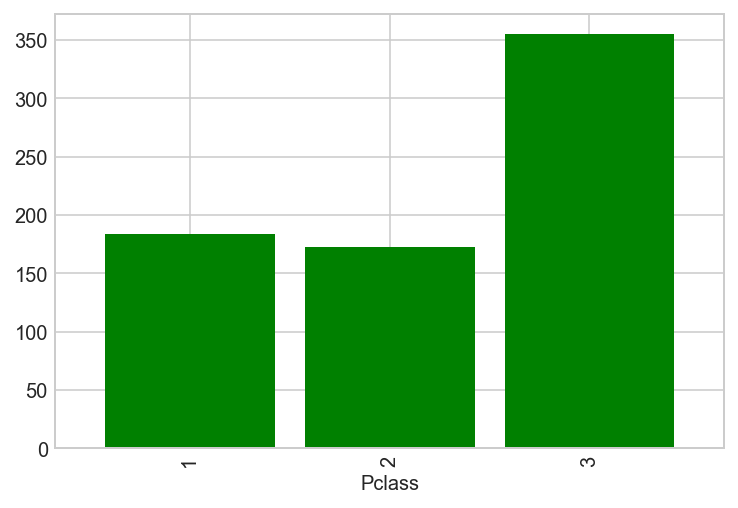

In [43]:
## Plot a kind='bar' of the number of Passengers by Pclass and Sex
    ## Does the graph look ok?
titanic.groupby("Pclass").size().plot(kind="bar", color="g", width=0.85)
plt.show()

### Groupby and graphs with more than one variable

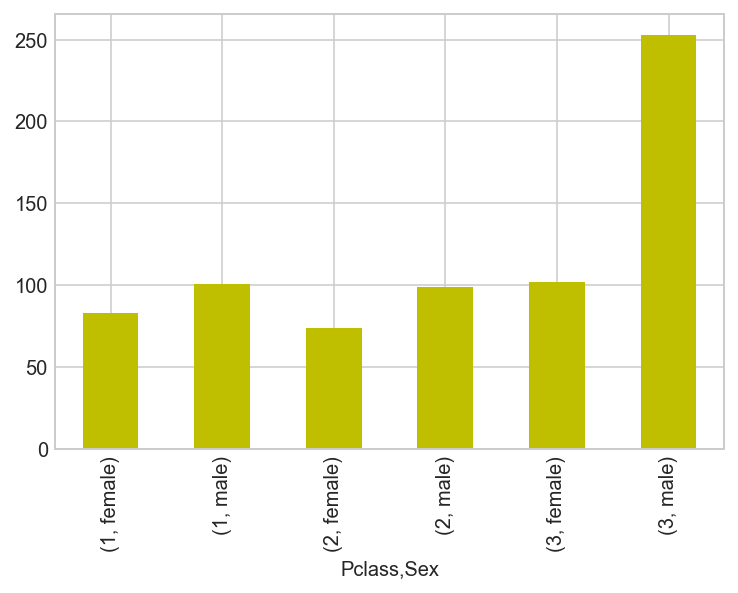

In [44]:
## Plot a kind='bar' of the data set group by Pclass and Sex, use .size()
titanic.groupby(['Pclass','Sex']).size().plot(kind="bar", color='y')
plt.show()

Pclass  Sex   
1       female     83
        male      101
2       female     74
        male       99
3       female    102
        male      253
dtype: int64


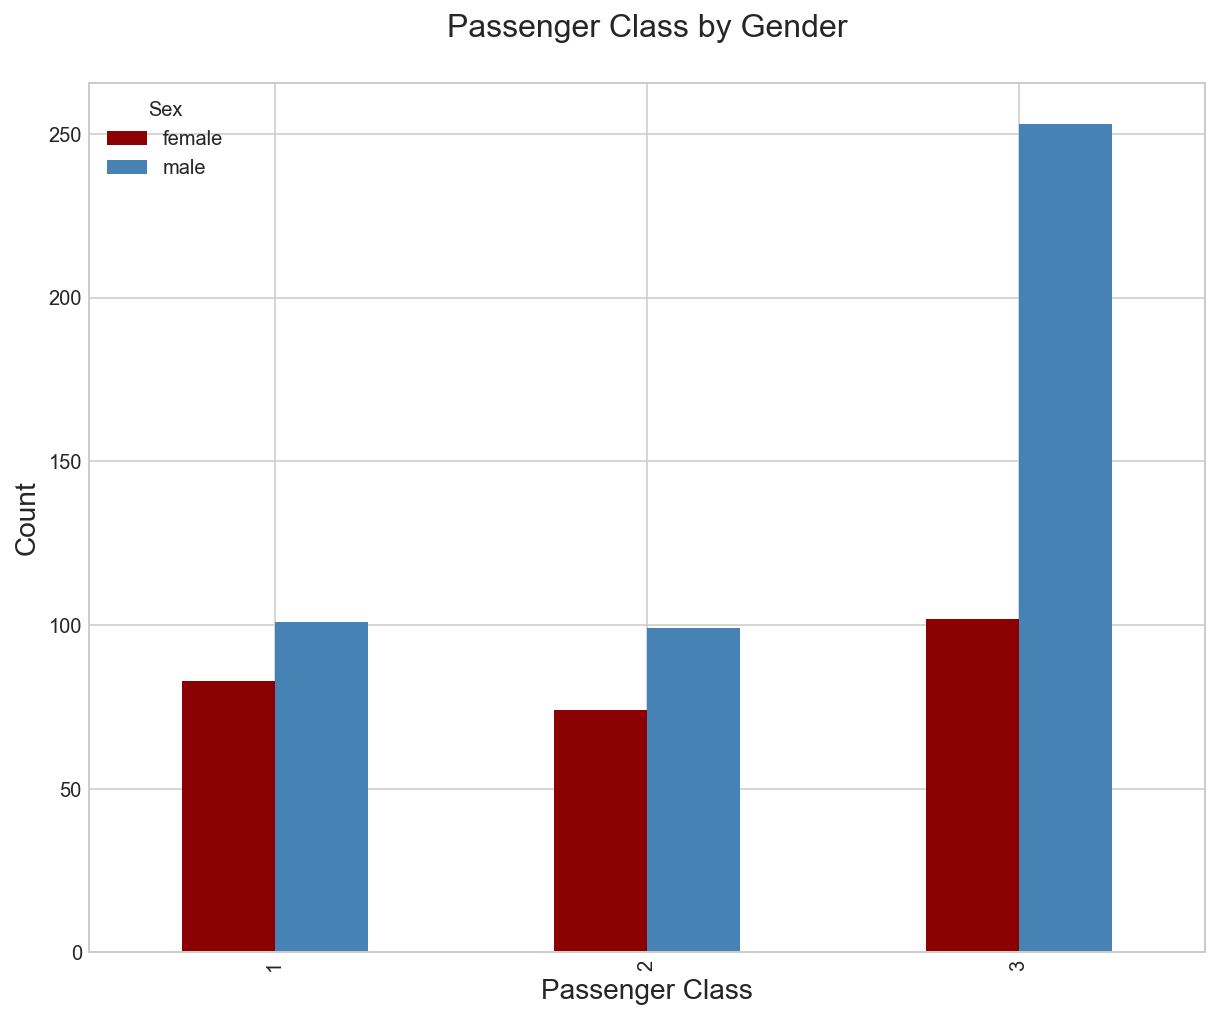

In [45]:
## Use the same code as before, make a kind='bar' graph, use unstack  => will pull-apart group values for easy display
    ## Class by Sex (Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd))
    ## .size().unstack(), color=['darkred', 'steelblue']
print(titanic.groupby(['Pclass','Sex']).size())
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
titanic.groupby(['Pclass','Sex']).size().unstack().plot(kind="bar", 
                                                        color=['darkred', 'steelblue'],
                                                        ax=ax)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title('Passenger Class by Gender\n', fontsize=16)
plt.show()

Pclass  Survived  Sex   
1       0         female      3
                  male       61
        1         female     80
                  male       40
2       0         female      6
                  male       84
        1         female     68
                  male       15
3       0         female     55
                  male      215
        1         female     47
                  male       38
dtype: int64


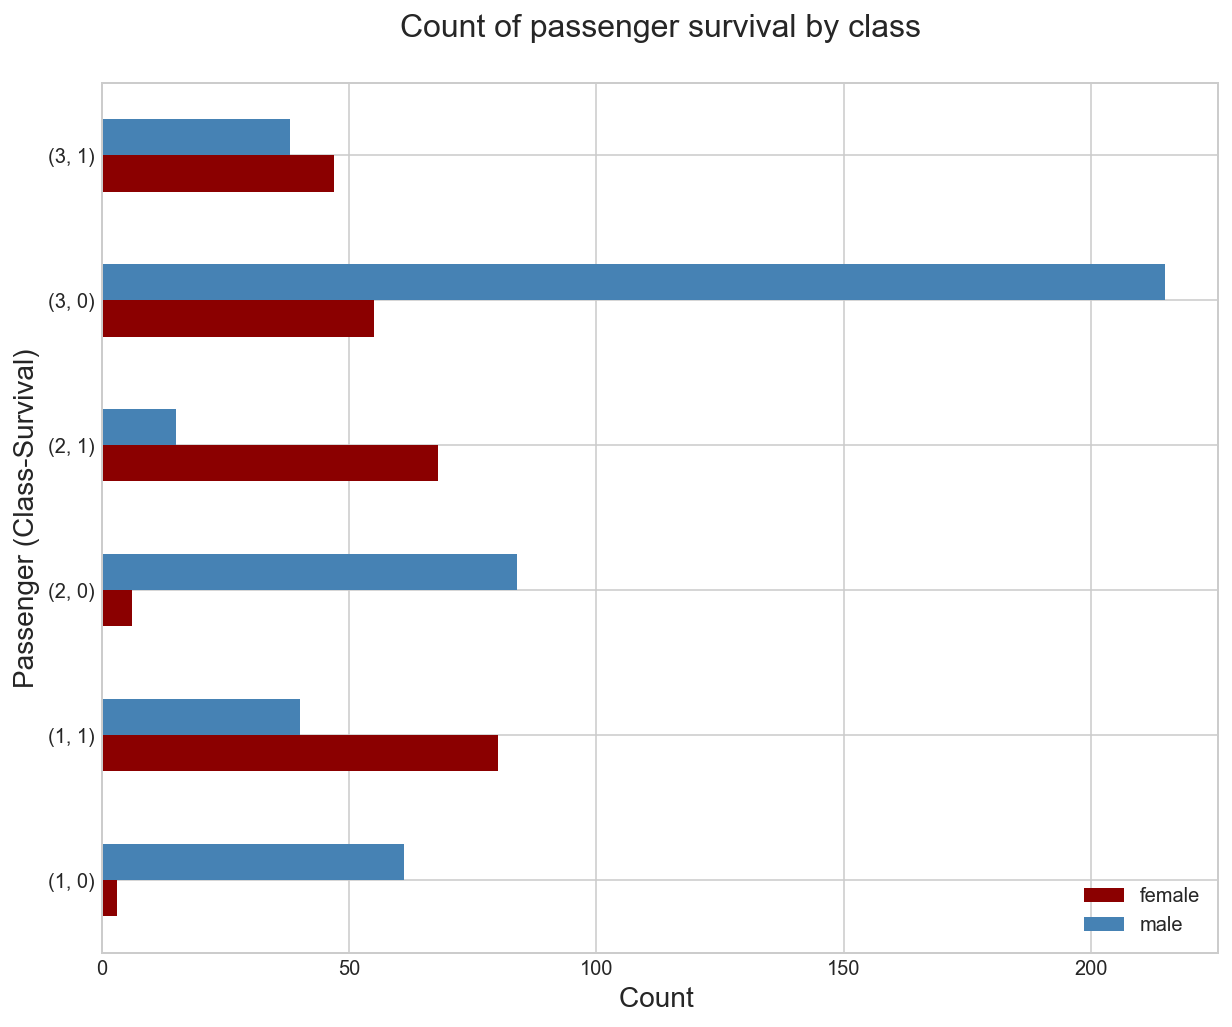

In [46]:
## Use the same code as before, make a kind='barh' graph, use unstack
print(titanic.groupby(['Pclass','Survived','Sex'])[['Age']].size())
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

titanic.groupby(['Pclass','Survived','Sex'])[['Age']].size().unstack().plot(kind="barh", 
                                                                            color=['darkred', 'steelblue'], 
                                                                            ax=ax)

plt.xlabel("Count ", fontsize=14)
plt.ylabel("Passenger (Class-Survival)", fontsize=14)
plt.title('Count of passenger survival by class\n', fontsize=16)
plt.legend(loc='lower right')
plt.show()

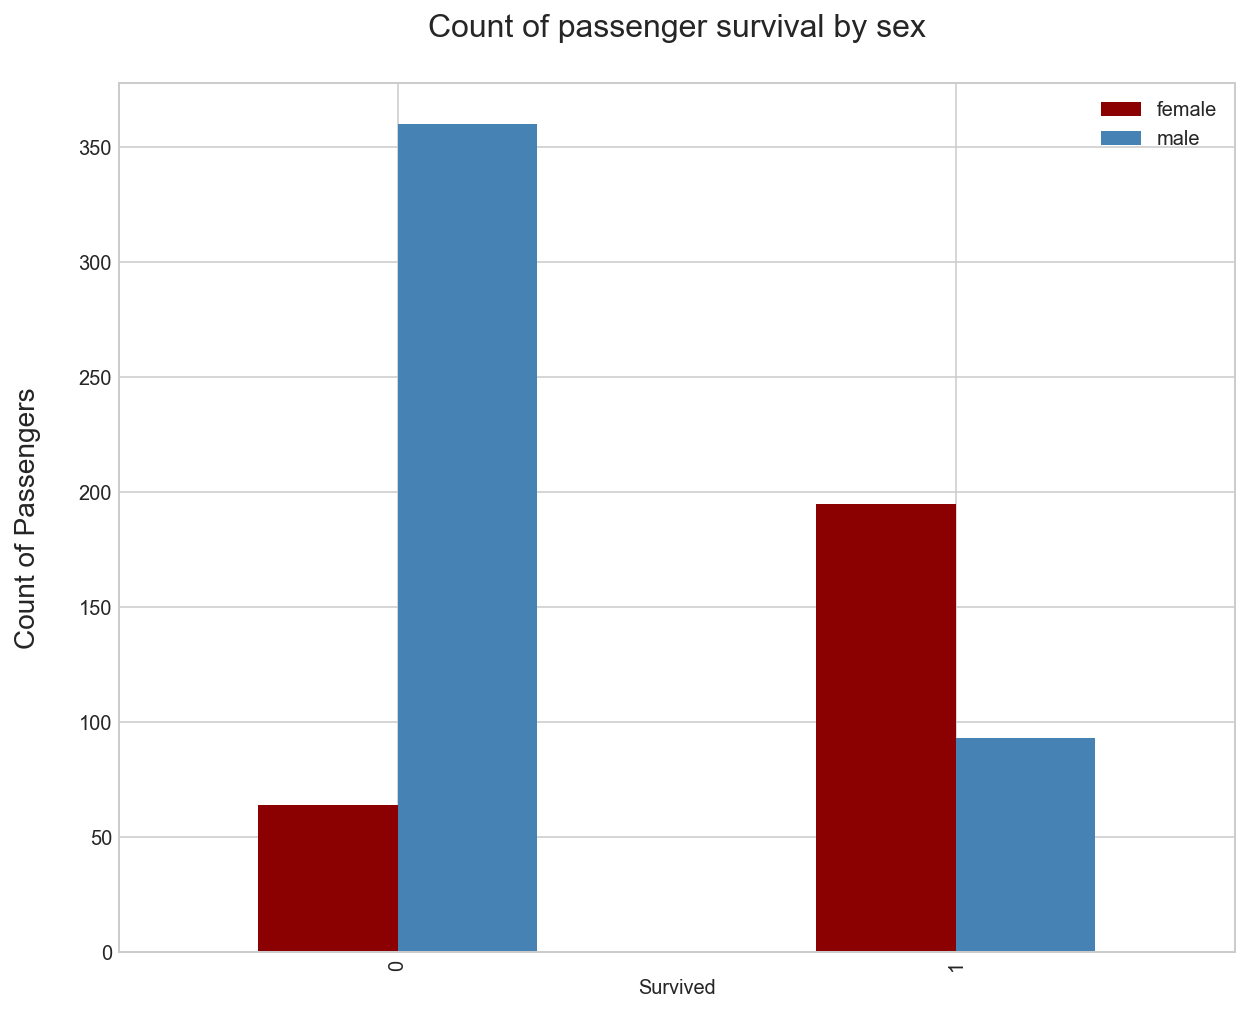

In [47]:
# Using unstack, create a kind='bar' that shows which group (men or women) survived the most

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
titanic.groupby(['Survived','Sex']).size().unstack().plot(kind="bar", color=['darkred', 'steelblue'], ax=ax)

plt.ylabel("Count of Passengers\n", fontsize=14)
plt.title('Count of passenger survival by sex\n', fontsize=16)
plt.legend(loc='upper right')
plt.show()
plt.show()

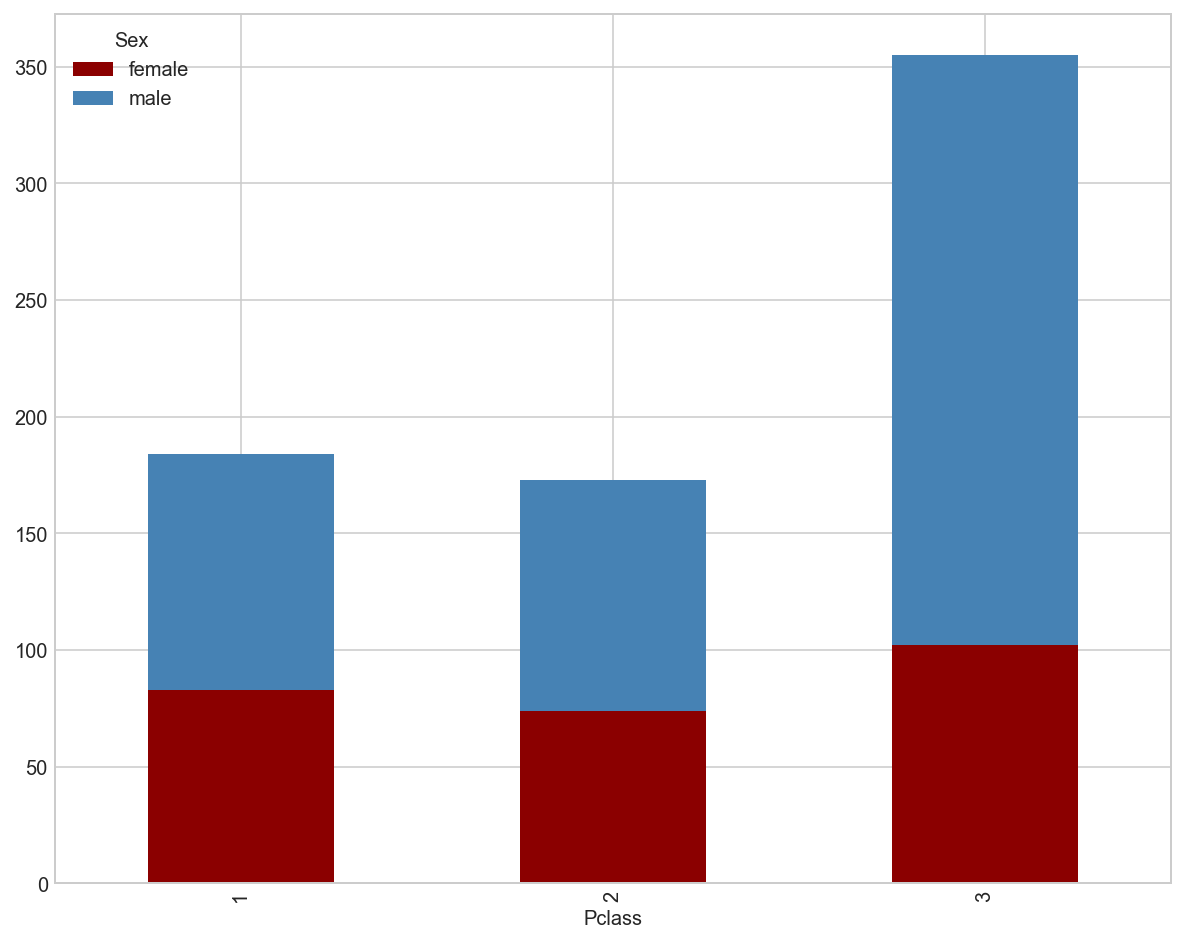

In [48]:
# Stacking isn't a bad choice for fewer categories but can look cluttery with lots of categories
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
titanic.groupby(['Pclass','Sex']).size().unstack().plot(kind="bar", stacked=True, color=['darkred', 'steelblue'], 
                                                        ax=ax)
plt.show()

Bar charts are great for displaying quanitites with groups and understanding quantity / size within subsets.  This is only an "introduction".  There are many ways to plot things.

***List of options for graph***
```python
‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or 'density' for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots
```

In [49]:
titanic.groupby( ['Sex','Embarked', 'Age'] )[ ['Survived'] ].size().reset_index().head(5)

,Sex,Embarked,Age,0
0,female,C,0.75,2
1,female,C,1.00,1
2,female,C,3.00,1
3,female,C,4.00,1
4,female,C,5.00,1


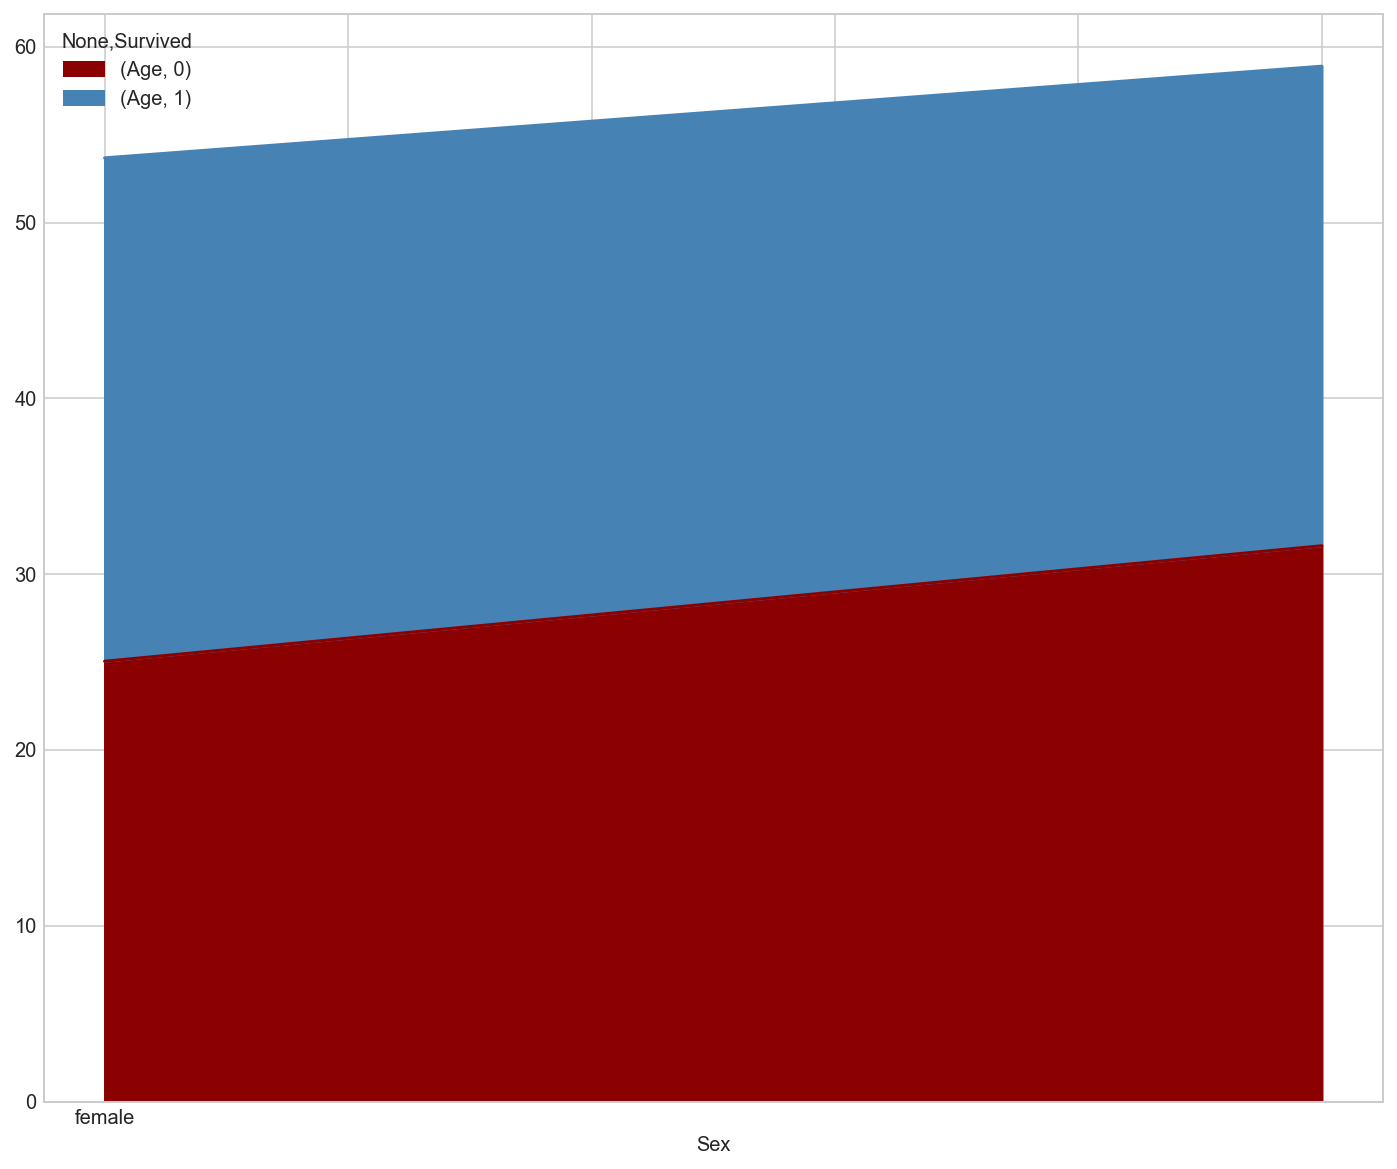

In [50]:
## Here is a graph that I hope you never use
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean().unstack().plot(kind="area", color=['darkred', 'steelblue'], 
                                                                        ax=ax)

plt.show()

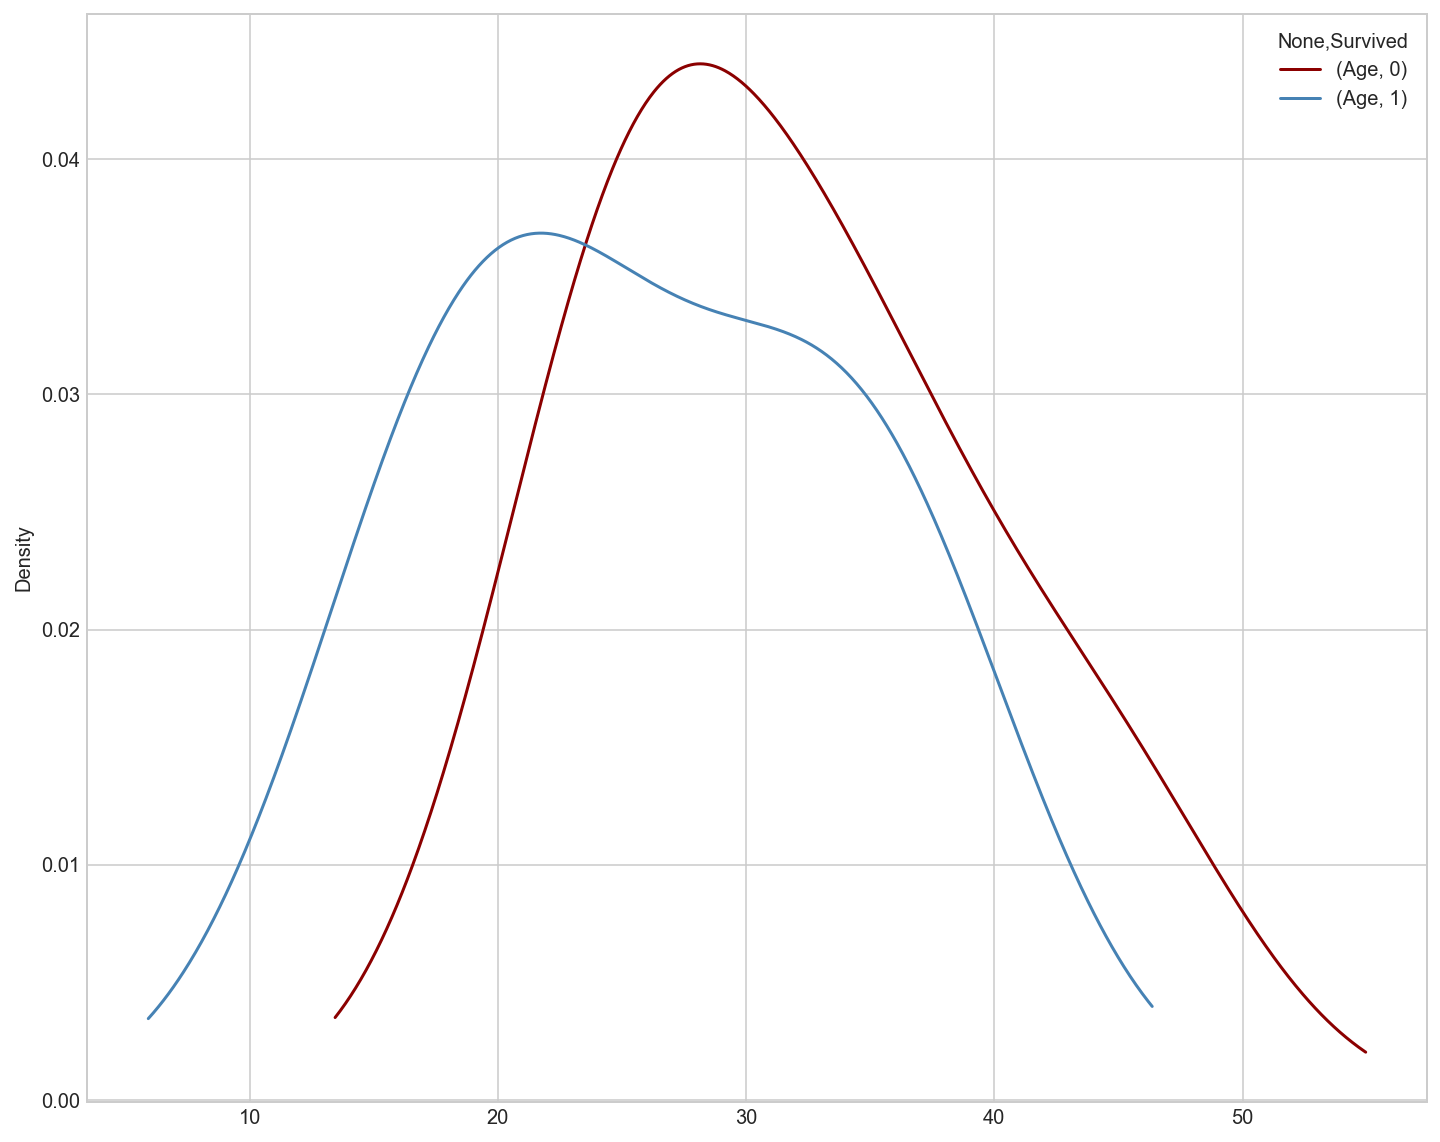

In [51]:
## Density Plot
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
titanic.groupby( ['Sex', 'Pclass','Survived'] )[ ['Age'] ].mean().unstack().plot(kind="kde", color=['darkred', 'steelblue'], 
                                                                                 ax=ax)
plt.show()

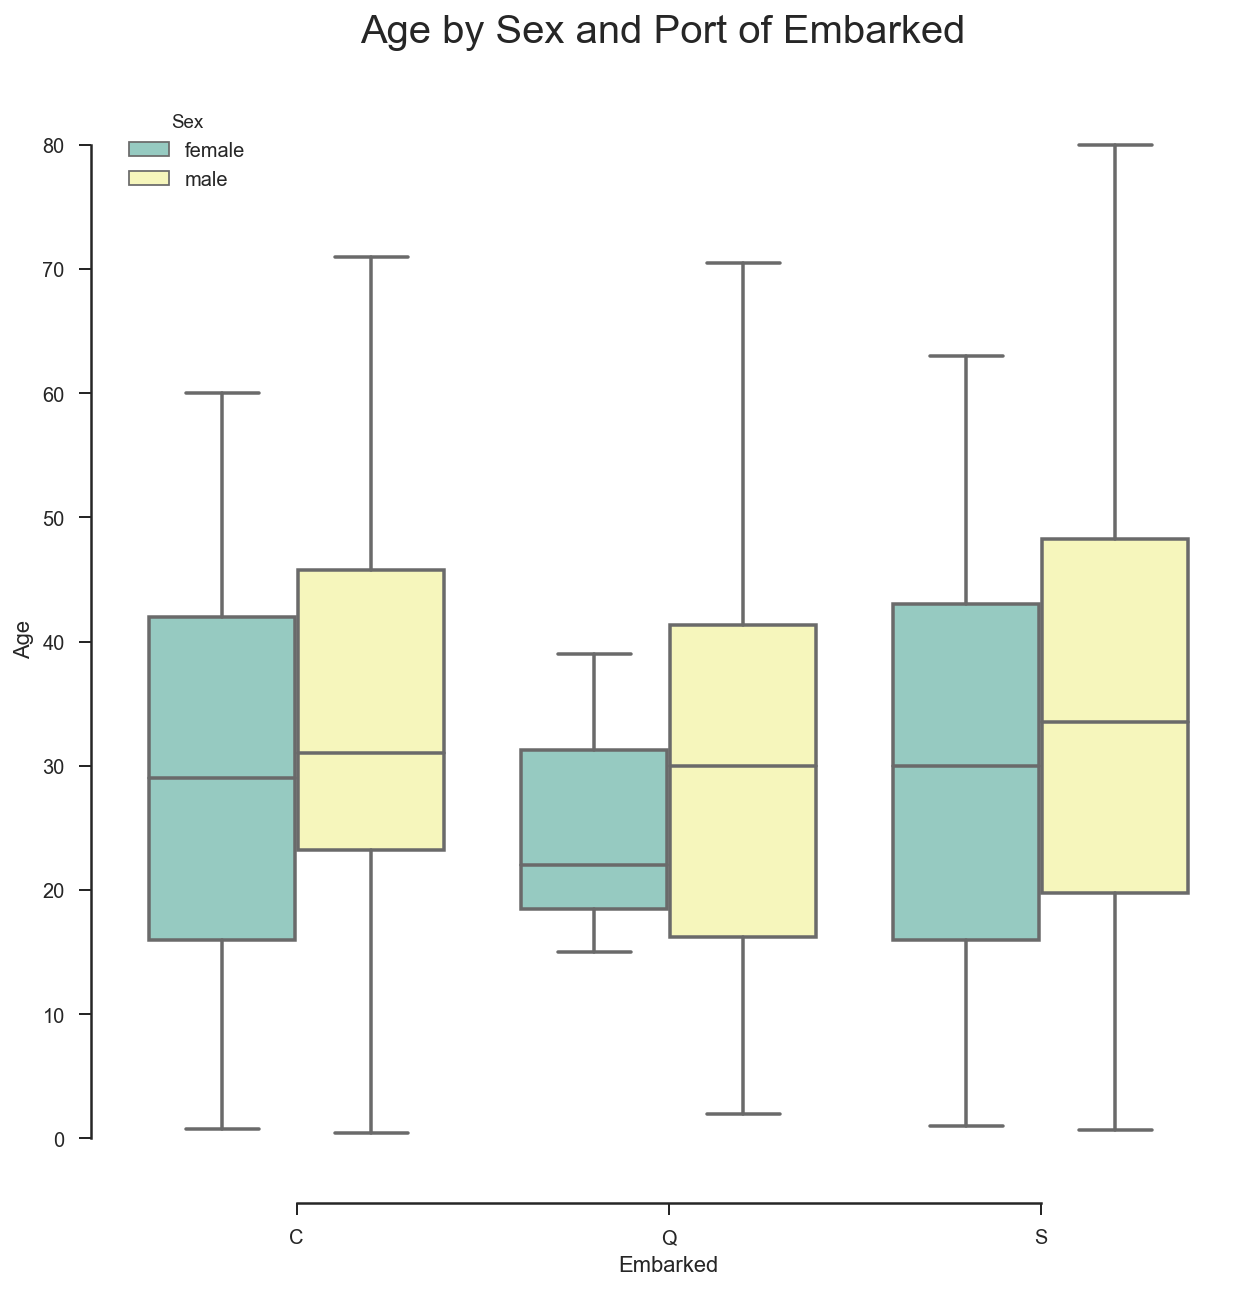

In [52]:
subset_tita = titanic.groupby( ['Sex','Embarked', 'Age']).size().reset_index()

fig = plt.figure(figsize=(10,10))
sns.set(style="ticks")

sns.boxplot(x='Embarked', y="Age", hue="Sex", data=subset_tita, palette="Set3")
sns.despine(offset=10, trim=True)

plt.title('Age by Sex and Port of Embarked \n', fontsize = 20)
plt.show()

In [53]:
# Other group by methods include -- 

groupby_list = """
gb.filter  gb.get_group  gb.height  gb.last gb.median gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform
gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var
gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight
"""
groupby_list

'\ngb.filter  gb.get_group  gb.height  gb.last gb.median gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform\ngb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var\ngb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight\n'